# Graph 5: Looping Graph

In [52]:
# imports
from langgraph.graph import StateGraph, START, END
from typing import List, TypedDict
import random

In [53]:
# Agent State Schema
class AgentState(TypedDict):
    """State for the agent."""
    name: str
    nums: List[int]
    counter: int
    final: str

In [54]:
# Node Definitions
def greetings(state: AgentState) -> AgentState:
    """Initial greeting."""
    state['final'] = f"Hello {state['name']}! Let's start counting."
    state['nums'] = []  # Initialize list of numbers
    return state

def count(state: AgentState) -> AgentState:
    """Add a random number to the list and decrement the counter."""
    new_num = random.randint(1, 10)  # Generate a random number between 1 and 10
    state['nums'].append(new_num)  # Add the number to the list
    state['counter'] -= 1  # Decrement the counter
    return state

def stopper(state: AgentState) -> AgentState:
    """Check if the counter has reached zero."""
    return "count_again" if state['counter'] > 0 else "finalize"
    

In [55]:
# Graph Definition
graph = StateGraph(AgentState)

graph.add_node("greeter", greetings)
graph.add_node("count", count)

graph.add_edge(START, "greeter")
graph.add_edge("greeter", "count")

graph.add_conditional_edges(
    "count", # source action
    stopper, # action
    {
        "count_again": "count",
        "finalize": END
    }
)

app = graph.compile()


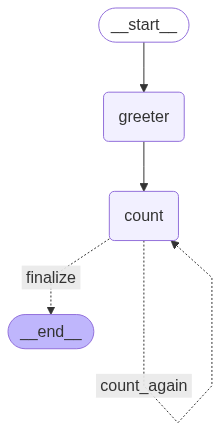

In [56]:
# visualization
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [57]:
example_state = AgentState(name="Banzo", counter=5)
app.invoke(example_state)

{'name': 'Banzo',
 'nums': [10, 8, 1, 6, 8],
 'counter': 0,
 'final': "Hello Banzo! Let's start counting."}

## Exercise: Number Guesser

In [24]:
# imports
from langgraph.graph import StateGraph, START, END
import random
from typing import List, TypedDict

In [25]:
# state schema
class AgentState(TypedDict):
    """State for the agent."""
    num_to_guess: int
    attempts_left: int
    lower_bount: int
    upper_bount: int
    guessed: List[int]
    final: str

In [91]:
# Nodes
i = 1
def setup_node(state: AgentState) -> AgentState:
    """Initial greeting and setup."""
    state['num_to_guess'] = random.randint(state['lower_bount'], state['upper_bount'])
    state['attempts_left'] = 5  
    state['guessed'] = []
    # debugging output
    global i
    print(f"{i}: {state}")
    i += 1
    return state


def guess_number(state: AgentState) -> AgentState:
    """Process the user's guess."""
    guess = random.randint(state['lower_bount'], state['upper_bount'])  # Simulate a guess
    state['guessed'].append(guess)  
    state['attempts_left'] -= 1  # Decrement attempts left
    
    # debugging output
    global i
    print(f"{i}: {state}")
    i += 1
    return state


def check_guess(state: AgentState) -> AgentState:
    """Check if the guess is correct and adjust the state accordingly."""
    last_guess = state['guessed'][-1] 
    if last_guess == state['num_to_guess']:
        state['final'] = f"Congratulations! You guessed the number {state['num_to_guess']}!"
    elif state['attempts_left'] <= 0:
        state['final'] = f"Sorry, you've run out of attempts! The number was {state['num_to_guess']}."
    elif last_guess < state['num_to_guess']:
        state['final'] = f"Your guess {last_guess} is too low. Try again!"
        state['lower_bount'] = last_guess + 1  # Adjust lower bound
    else:
        state['final'] = f"Your guess {last_guess} is too high. Try again!"
        state['upper_bount'] = last_guess - 1
    # debugging output
    global i
    print(f"{i}: {state}")
    i += 1
    return state

# Not a node, but a function to determine the next action
def validate_guess(state: AgentState) -> str:
    """Determine the next action based on the state."""
    if state['final'].startswith("Congratulations") or state['final'].startswith("Sorry"):
        return "finalize"
    return "guess"




In [92]:
# State Graph
graph = StateGraph(AgentState)

graph.add_node("setup", setup_node)
graph.add_node("guess_number", guess_number)
graph.add_node("check_guess", check_guess)

graph.add_edge(START, "setup")
graph.add_edge("setup", "guess_number")
graph.add_edge("guess_number", "check_guess")

graph.add_conditional_edges(
    "check_guess",  # source action
    validate_guess,  # action to determine next step
    {
        "guess": "guess_number",  # if guess is needed, go back to guessing
        "finalize": END  # if game is over, end the game
    }
)
app = graph.compile()



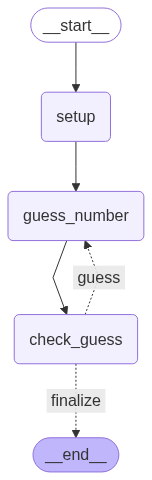

In [93]:
# Run the visualization
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [94]:
# example state
example_state = AgentState(
    lower_bount=1,
    upper_bount=50,
)
app.invoke(example_state)

1: {'lower_bount': 1, 'upper_bount': 50, 'num_to_guess': 46, 'attempts_left': 5, 'guessed': []}
2: {'num_to_guess': 46, 'attempts_left': 4, 'lower_bount': 1, 'upper_bount': 50, 'guessed': [34]}
3: {'num_to_guess': 46, 'attempts_left': 4, 'lower_bount': 35, 'upper_bount': 50, 'guessed': [34], 'final': 'Your guess 34 is too low. Try again!'}
4: {'num_to_guess': 46, 'attempts_left': 3, 'lower_bount': 35, 'upper_bount': 50, 'guessed': [34, 38], 'final': 'Your guess 34 is too low. Try again!'}
5: {'num_to_guess': 46, 'attempts_left': 3, 'lower_bount': 39, 'upper_bount': 50, 'guessed': [34, 38], 'final': 'Your guess 38 is too low. Try again!'}
6: {'num_to_guess': 46, 'attempts_left': 2, 'lower_bount': 39, 'upper_bount': 50, 'guessed': [34, 38, 45], 'final': 'Your guess 38 is too low. Try again!'}
7: {'num_to_guess': 46, 'attempts_left': 2, 'lower_bount': 46, 'upper_bount': 50, 'guessed': [34, 38, 45], 'final': 'Your guess 45 is too low. Try again!'}
8: {'num_to_guess': 46, 'attempts_left': 1

{'num_to_guess': 46,
 'attempts_left': 0,
 'lower_bount': 46,
 'upper_bount': 49,
 'guessed': [34, 38, 45, 50, 47],
 'final': "Sorry, you've run out of attempts! The number was 46."}